In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import sys, os
from glob import glob
# import seaborn as sns

In [2]:
# %matplotlib widget

In [3]:
%matplotlib inline

In [4]:
path_to_labels = "../../data/labels_mp_0.0005_1000_2017/"
path_to_merged = "../../data/quotes_merged_mp/"
path_to_har = '../../data/HAR/RV_Erfan.csv'

In [5]:
filenames = glob(path_to_labels+'/*.csv')
dataframes = [pd.read_csv(f) for f in filenames]


In [10]:
full_df = pd.concat(dataframes, axis=0, ignore_index=True)
bars_df = full_df.copy()

In [11]:
bars_df['date'] = bars_df['Date-Time'].apply(lambda x:x[:10])
bars_df.head()

,original_index,Date-Time,Bid Price,Ask Price,Bid Size,Ask Size,Seq. No.,Exch Time,#RIC,dailyVolatility,pt_long_ind,sl_long_ind,pt_short_ind,sl_short_ind,end_ind,long_label,short_label,date
0,1210,2017-01-06 00:32:25.944898931-06:00,2263.50,2263.75,49.0,178.0,9162081,06:32:25.935000000,ESH7,1.0,NaN,NaN,NaN,NaN,1576.0,0,0,2017-01-06
1,3010,2017-01-06 01:05:21.741993931-06:00,2262.75,2263.00,282.0,480.0,9168169,07:05:21.733000000,ESH7,1.0,NaN,NaN,NaN,NaN,4160.0,0,0,2017-01-06
2,3659,2017-01-06 01:10:00.901004858-06:00,2262.25,2262.50,19.0,132.0,9170891,07:10:00.892000000,ESH7,1.0,NaN,NaN,NaN,NaN,4406.0,0,0,2017-01-06
3,5454,2017-01-06 01:30:11.953486603-06:00,2262.50,2262.50,1387.0,414.0,9177311,07:30:11.902000000,ESH7,1.0,NaN,NaN,NaN,NaN,5909.0,0,0,2017-01-06
4,6198,2017-01-06 01:44:25.518004300-06:00,2262.00,2262.25,2594.0,537.0,9180468,07:44:25.509000000,ESH7,1.0,NaN,NaN,NaN,NaN,7234.0,0,0,2017-01-06


In [24]:
def scale(x): return (x / x.mean())
df_har_data = pd.read_csv(path_to_har)
df_har_data["old Standard HAR (Log RV) 1-Month"] = df_har_data["HAR (Log RV) 1-Month"].pipe(scale)
df_har_data["old Standard HAR (Log RV) 1-Month 2 "] = df_har_data["HAR (Log RV) 1-Month"].apply(lambda x:x/mean_old)
df_har_data["Squared HAR (Log RV) 1-Month"] = df_har_data["HAR (Log RV) 1-Month"].apply(np.sqrt)
df_har_data["Standard HAR (Log RV) 1-Month"] = df_har_data["Squared HAR (Log RV) 1-Month"].pipe(scale)

df_har_data_2017 = df_har_data[df_har_data['Date[L]']<'2018-01-01']

In [25]:

mean_old = np.mean(df_har_data["HAR (Log RV) 1-Month"])
mean_sqrt = np.mean(df_har_data["Squared HAR (Log RV) 1-Month"])
df_har_data["new Standard Squared HAR (Log RV) 1-Month"] = df_har_data["old Standard HAR (Log RV) 1-Month"].apply(lambda x:np.sqrt(x*mean_old)/mean_sqrt)

In [26]:
df_har_data.tail()

,Date[L],Open Price,Low Price,High Price,Close Price,Return,Log Return,Count,RV,Scaled RV,...,RV_D_Ahead,HAR 1-Month,HAR (Log RV) 1-Month,HAR 1-Day,HAR (Log RV) 1-Day,old Standard HAR (Log RV) 1-Month,old Standard HAR (Log RV) 1-Month 2,Squared HAR (Log RV) 1-Month,Standard HAR (Log RV) 1-Month,new Standard Squared HAR (Log RV) 1-Month
906,2020-08-13,3365.25,3357.50,3382.00,3367.00,-8.902077,-8.906042,81,5925.213570,5639.016104,...,4466.182897,11998.128585,17178.375777,29099.775635,8168.402060,1.583493,1.583493,131.066303,1.381750,1.381750
907,2020-08-14,3363.50,3356.00,3373.50,3361.50,-16.335016,-16.348373,81,4692.855459,4466.182897,...,1320.732703,10973.489266,14928.354583,28588.561480,6927.912993,1.376087,1.376087,122.181646,1.288084,1.288084
908,2020-08-17,3378.75,3374.00,3382.75,3380.00,55.034955,54.884066,81,1387.763963,1320.732703,...,4887.794750,9142.986397,9406.631359,27402.896270,3655.978564,0.867098,0.867098,96.987790,1.022481,1.022481
909,2020-08-18,3382.75,3365.25,3390.75,3386.25,18.491124,18.474049,81,5135.865415,4887.794750,...,4369.641275,9658.453591,12090.652364,28377.396452,5936.508259,1.114509,1.114509,109.957503,1.159213,1.159213
910,2020-08-19,3390.00,3365.50,3395.75,3372.25,-41.343669,-41.429370,81,4591.414052,4369.641275,...,NaN,9403.122388,11536.514409,28200.390875,5564.948286,1.063429,1.063429,107.408167,1.132337,1.132337


In [29]:
mean_sqrt

94.85532420082409

## Daily Volatality Distribution

Text(0.5, 1.0, 'Standard (scaled) Root Squared HAR (Log RV) 1-Month')

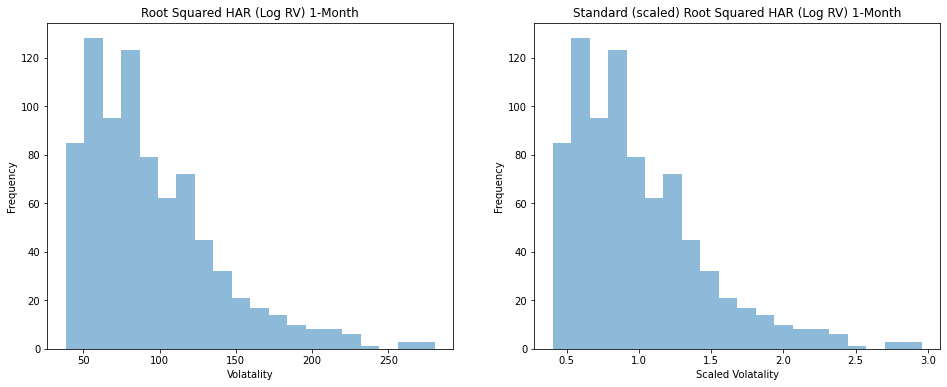

In [37]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16,6))

df_har_data["Squared HAR (Log RV) 1-Month"].plot.hist(bins=20, alpha=0.5, ax = axes[0])
df_har_data["Standard HAR (Log RV) 1-Month"].plot.hist(bins=20, alpha=0.5, ax = axes[1])
axes[0].set_xlabel('Volatality')
axes[0].set_title('Root Squared HAR (Log RV) 1-Month')
axes[1].set_xlabel('Scaled Volatality')
axes[1].set_title('Standard (scaled) Root Squared HAR (Log RV) 1-Month')

In [26]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16,6))

df_har_data_2017["Squared HAR (Log RV) 1-Month"].plot.hist(bins=10, alpha=0.5, ax = axes[0])
df_har_data_2017["Standard HAR (Log RV) 1-Month"].plot.hist(bins=10, alpha=0.5, ax = axes[1])

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

<AxesSubplot:ylabel='Frequency'>

In [28]:
bars_df["dailyVolatility"].plot.hist(bins=10, alpha=0.5)
plt.show()

<AxesSubplot:ylabel='Frequency'>

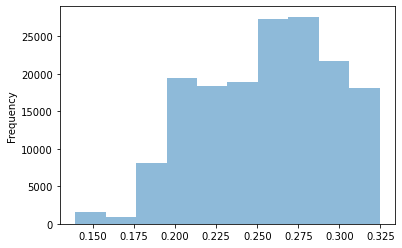

In [49]:
temp_df = bars_df[bars_df['Date-Time']>'2017-05-31']
temp_df["dailyVolatility"].plot.hist(bins=10, alpha=0.5)

## Summary of actions per day

In [55]:
temp_df[['date','long_label']].groupby('date').sum().describe()

,long_label
count,137.000000
mean,-27.007299
std,69.109089
min,-230.000000
25%,-73.000000
50%,-27.000000
75%,14.000000
max,190.000000


In [32]:
temp_df = bars_df[['date', 'long_label', 'short_label']].groupby('date').sum()

In [33]:
temp_df.describe()

,long_label,short_label
count,236.000000,236.000000
mean,-19.122881,-30.372881
std,103.428204,102.723450
min,-578.000000,-398.000000
25%,-74.000000,-86.000000
50%,-22.000000,-31.500000
75%,28.500000,22.500000
max,377.000000,526.000000


## short !=Long

In [56]:
sum(bars_df[['long_label','short_label']].apply(lambda x: x[0]+x[1], axis=1)!=0)/len(bars_df)

0.03326916216234409

In [75]:
bars_df

,original_index,Date-Time,Bid Price,Ask Price,Bid Size,Ask Size,Seq. No.,Exch Time,#RIC,dailyVolatility,pt_long_ind,sl_long_ind,pt_short_ind,sl_short_ind,end_ind,long_label,short_label,date
0,1210,2017-01-06 00:32:25.944898931-06:00,2263.50,2263.75,49.0,178.0,9162081,06:32:25.935000000,ESH7,1.000000,NaN,1211.0,1211.0,NaN,1576.0,-1,1,2017-01-06
1,3010,2017-01-06 01:05:21.741993931-06:00,2262.75,2263.00,282.0,480.0,9168169,07:05:21.733000000,ESH7,1.000000,NaN,3022.0,3022.0,NaN,4160.0,-1,1,2017-01-06
2,3659,2017-01-06 01:10:00.901004858-06:00,2262.25,2262.50,19.0,132.0,9170891,07:10:00.892000000,ESH7,1.000000,4059.0,3666.0,3664.0,4059.0,4406.0,-1,1,2017-01-06
3,5454,2017-01-06 01:30:11.953486603-06:00,2262.50,2262.50,1387.0,414.0,9177311,07:30:11.902000000,ESH7,1.000000,NaN,5455.0,5718.0,5467.0,5909.0,-1,-1,2017-01-06
4,6198,2017-01-06 01:44:25.518004300-06:00,2262.00,2262.25,2594.0,537.0,9180468,07:44:25.509000000,ESH7,1.000000,6208.0,6366.0,6366.0,6208.0,7234.0,1,-1,2017-01-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297117,379329,2017-12-29 15:57:15.135200607-06:00,2668.25,2668.50,90.0,191.0,5305042,21:57:15.128000000,ESH8,0.189803,379443.0,379382.0,379382.0,379443.0,380366.0,-1,1,2017-12-29
297118,379443,2017-12-29 15:57:32.178796159-06:00,2668.50,2668.75,1167.0,1055.0,5305853,21:57:28.745000000,ESH8,0.189803,379954.0,379459.0,379459.0,379954.0,380366.0,-1,1,2017-12-29
297119,379631,2017-12-29 15:58:00.587354198-06:00,2668.00,2668.25,195.0,22.0,5307321,21:58:00.577000000,ESH8,0.189803,379649.0,379736.0,379736.0,379649.0,380366.0,1,-1,2017-12-29
297120,379859,2017-12-29 15:59:04.062700646-06:00,2668.25,2668.50,870.0,99.0,5309101,21:59:03.271000000,ESH8,0.189803,379875.0,380337.0,380337.0,379875.0,380366.0,1,-1,2017-12-29


## windows

In [23]:
# check other notebook

In [19]:
%matplotlib inline

# count lables

In [44]:
temp_df = bars_df[['date', 'long_label']]
temp_df['pt_long'] = (temp_df['long_label']==1)
temp_df['sl_long'] = (temp_df['long_label']==-1)
temp_2_df= temp_df[['date', 'pt_long','sl_long']].groupby('date').sum()

/anaconda/envs/azureml_py36/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/anaconda/envs/azureml_py36/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


<AxesSubplot:ylabel='Frequency'>

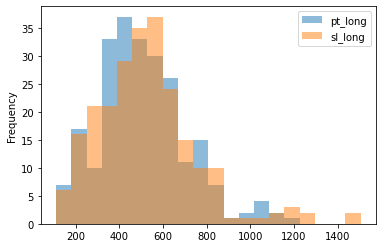

In [57]:
temp_2_df.plot.hist(bins=20, alpha=0.5)